In [8]:
import sys
sys.path.append('/Users/kate_fieseler/PycharmProjects/chemUtils')
import chemUtils
from chemUtils.molPlacement import embedMolbyRefsMCS

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw,PyMol,MCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
print(rdBase.rdkitVersion)

2022.09.5


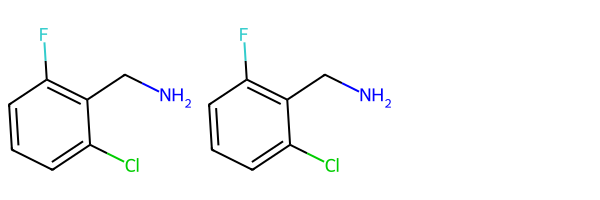

In [12]:
# Show molecules to embed
mols = [Chem.MolFromSmiles('[H]c1c([H])c(F)c(C([H])([H])N([H])[H])c(Cl)c1[H]'),Chem.MolFromSmiles('[H]c1c([H])c(F)c(C([H])([H])N([H])[H])c(Cl)c1[H]')]
Draw.MolsToGridImage(mols)

In [15]:
# Try to embed
import py3Dmol
def drawit(ms, p=None, confId=-1, removeHs=True,colors=('cyanCarbon','redCarbon','blueCarbon')):
        if p is None:
            p = py3Dmol.view(width=400, height=400)
        p.removeAllModels()
        for i,m in enumerate(ms):
            if removeHs:
                m = Chem.RemoveHs(m)
            IPythonConsole.addMolToView(m,p,confId=confId)
            p.setStyle({'model':-1,},
                            {'stick':{'colorscheme':colors[i%len(colors)]}})
        p.zoomTo()
        return p.show()

In [19]:
drawit(mols)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [21]:
rmsd = chemUtils.molPlacement.embedding.calc_RMSD_between_original_and_mcs(mols[0],mols[1])
rmsd

0.6865039036599663

In [22]:
mol1 = Chem.AddHs(mols[0], addCoords=True)
mol2 = Chem.AddHs(mols[1], addCoords=True)
drawit([mol1,mol2])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [36]:
AllChem.EmbedMolecule(mol1)
AllChem.EmbedMolecule(mol2)
AllChem.GetBestRMS(mol1, mol2)
# RMSD is not 0 because they have random 3D embeddings

1.2726621022376365

In [37]:
embedded = AllChem.ConstrainedEmbed(mols[0], mols[1])
embedded

ValueError: Bad Conformer Id